In [ ]:
ㅁimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/test4.csv")
data

,x,y,z
0,1,2,0
1,2,1,0
2,3,1,0
3,1,3,0
4,2,2,0
5,7,7,1
6,6,8,1
7,8,6,1
8,7,6,1
9,6,7,1


In [ ]:
X=np.array(data['x'])
Y=np.array(data["y"])
Z=np.array(data["z"])

In [ ]:
input=np.column_stack((X,Y))
input

array([[1, 2],
       [2, 1],
       [3, 1],
       [1, 3],
       [2, 2],
       [7, 7],
       [6, 8],
       [8, 6],
       [7, 6],
       [6, 7]])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output=train_test_split(input, Z)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [ ]:
DT.fit(train_input, train_output)

DecisionTreeClassifier()

In [ ]:
DT.score(test_input,test_output)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
confusion_matrix(test_output, DT.predict(test_input))

array([[1, 0],
       [0, 2]])

In [ ]:
TP=confusion_matrix(test_output, DT.predict(test_input))[0,0]
FN=confusion_matrix(test_output, DT.predict(test_input))[0,1]# : Type 2 error
FP=confusion_matrix(test_output, DT.predict(test_input))[1,0]# : Type 1 error
TN=confusion_matrix(test_output, DT.predict(test_input))[1,1]

In [ ]:
Sen=TP/(TP+FN) #Sensitivity, Recall
Spe=FN/(TN+FP) #Specificity
Pre=TP/(TP+FP) #Precision
Acc=(TP+TN)/(TP+TN+FP+FN) #Accuracy
Sen,Spe,Pre,Acc

(1.0, 0.0, 1.0, 1.0)

In [ ]:
pos_prob=DT.predict_proba(test_input)[:,1]

FPR,TPR,threshold=roc_curve(test_output,pos_prob)

Text(0.5, 0, 'False positive rate')

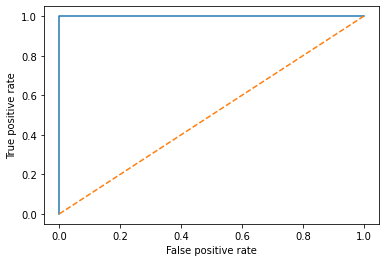

In [ ]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")

In [ ]:
from sklearn.metrics import auc
auc(FPR,TPR)

1.0

In [ ]:
data2=pd.read_csv("/content/test5.csv")
data2

,x,y,z
0,1,2,0
1,2,1,1
2,3,1,0
3,1,3,1
4,2,2,1
5,7,7,0
6,6,8,1
7,8,6,0
8,7,6,1
9,6,7,1


In [ ]:
X2=np.array(data2['x'])
Y2=np.array(data2["y"])
Z2=np.array(data2["z"])

In [ ]:
input2=np.column_stack((X2,Y2))
input2

array([[1, 2],
       [2, 1],
       [3, 1],
       [1, 3],
       [2, 2],
       [7, 7],
       [6, 8],
       [8, 6],
       [7, 6],
       [6, 7]])

In [ ]:
train_input2, test_input2, train_output2, test_output2=train_test_split(input2, Z2)

In [ ]:
DT2=DecisionTreeClassifier()

In [ ]:
DT2.fit(train_input2,train_output2)
DT2.score(test_input2,test_output2)

0.3333333333333333

In [ ]:
confusion_matrix(test_output2, DT2.predict(test_input2))

array([[0, 2],
       [0, 1]])

In [ ]:
TP2=confusion_matrix(test_output2, DT2.predict(test_input2))[0,0]
FN2=confusion_matrix(test_output2, DT2.predict(test_input2))[0,1]# : Type 2 error
FP2=confusion_matrix(test_output2, DT2.predict(test_input2))[1,0]# : Type 1 error
TN2=confusion_matrix(test_output2, DT2.predict(test_input2))[1,1]

In [ ]:
Sen2=TP/(TP2+FN2) #Sensitivity, Recall
Spe2=FN/(TN2+FP2) #Specificity
Pre2=TP/(TP2+FP2) #Precision
Acc2=(TP2+TN2)/(TP2+TN2+FP2+FN2) #Accuracy
Sen2,Spe2,Pre2,Acc2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


(0.5, 0.0, inf, 0.3333333333333333)

In [ ]:
pos_prob2=DT2.predict_proba(test_input2)[:,1]

FPR2,TPR2,threshold=roc_curve(test_output2,pos_prob2)

Text(0.5, 0, 'False positive rate')

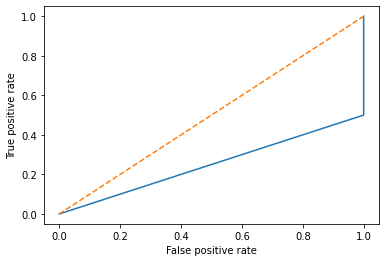

In [ ]:
plt.plot(FPR2,TPR2)
plt.plot([0,1],[0,1],'--')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")

In [ ]:
auc(FPR2,TPR2)

0.25